In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data_url = '/Users/apple/Desktop/ml-1m/ratings.dat'
reviews = pd.read_csv(data_url, names=['userID', 'movieID', 'rating', 'time'], delimiter='::', engine= 'python')
print('Rows:', reviews.shape[0], '; Columns:', reviews.shape[1], '\n')
reviews.head()

Rows: 1000209 ; Columns: 4 



,userID,movieID,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [25]:
print('No. of Unique Users    :', reviews.userID.nunique())
print('No. of Unique Movies :', reviews.movieID.nunique())
print('No. of Unique Ratings  :', reviews.rating.nunique())

No. of Unique Users    : 6040
No. of Unique Movies : 3706
No. of Unique Ratings  : 5


In [26]:
rts_gp = reviews.groupby(by=['rating']).agg({'userID': 'count'}).reset_index()
rts_gp.columns = ['Rating', 'Count']

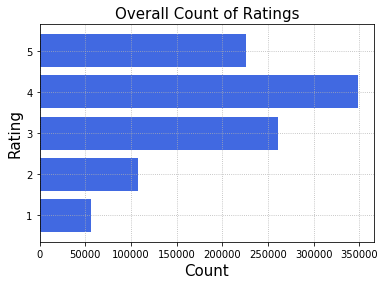

In [27]:
plt.barh(rts_gp.Rating, rts_gp.Count, color='royalblue')
plt.title('Overall Count of Ratings', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.grid(ls='dotted')
plt.show()

In [45]:
import time

#For Movies
col1=['Movie_id','Title','Genre']
data_url1 = '/Users/apple/Desktop/ml-1m/movies.dat'
movies = pd.read_csv(data_url1, header=0, names=col1, delimiter='::', engine= 'python')
movies.head()

#For Ratings
col2=['User_id','Movie_id','Rating','TimeStamp']
data_url2 = '/Users/apple/Desktop/ml-1m/ratings.dat'
ratings = pd.read_csv(data_url2, header=0, names=col2, delimiter='::', engine= 'python')
ratings.head()

#For Users
col3=['User_id','Gender','Age','Occupation','Zipcode']
data_url3 = '/Users/apple/Desktop/ml-1m/users.dat'
users = pd.read_csv(data_url3, header=0, names=col3, delimiter='::', engine= 'python')
users.head()

#Tried Zipcode also but not getting all zipcodes(got 70% of them). Used geocoders packacge

#data is merged
data = pd.merge(pd.merge(ratings,movies),users)

#TimeStamp Settings
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'],unit='s',)
data.insert(4,"Year",data.TimeStamp.map(lambda x: x.year),allow_duplicates=True)
data.insert(4,"Month",data.TimeStamp.map(lambda x: x.month),allow_duplicates=True)


data.to_csv('/Users/apple/Desktop/ml-1m/MovieData1.csv')
data

,User_id,Movie_id,Rating,TimeStamp,Month,Year,Title,Genre,Gender,Age,Occupation,Zipcode
0,23,661,2,2001-01-02 18:38:59,1,2001,James and the Giant Peach (1996),Animation|Children's|Musical,M,35,0,90049
1,23,2355,3,2001-01-02 19:56:44,1,2001,"Bug's Life, A (1998)",Animation|Children's|Comedy,M,35,0,90049
2,23,595,3,2001-01-02 19:28:31,1,2001,Beauty and the Beast (1991),Animation|Children's|Musical,M,35,0,90049
3,23,2797,4,2001-01-02 18:50:10,1,2001,Big (1988),Comedy|Fantasy,M,35,0,90049
4,23,720,4,2001-01-02 19:26:54,1,2001,Wallace & Gromit: The Best of Aardman Animatio...,Animation,M,35,0,90049
...,...,...,...,...,...,...,...,...,...,...,...,...
998075,4211,3791,2,2000-08-03 16:11:15,8,2000,Footloose (1984),Drama,M,45,5,77662
998076,4211,3806,3,2000-08-03 16:12:18,8,2000,MacKenna's Gold (1969),Western,M,45,5,77662
998077,4211,3840,4,2000-08-03 16:13:17,8,2000,Pumpkinhead (1988),Horror,M,45,5,77662
998078,4211,3766,2,2000-08-03 16:12:18,8,2000,Missing in Action (1984),Action|War,M,45,5,77662


In [46]:
#How many movies have an average rating over 4.5 overall?

#Extract data from merged file
import pandas as pd
Wholedata = pd.read_csv('/Users/apple/Desktop/ml-1m/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre and get the mean
Groupmid=Wholedata.groupby(["Movie_id","Title","Genre"])["Rating"].mean()
Groupmid.head()

#Ratings above 4.5
df=pd.DataFrame(Groupmid)
df.reset_index(level=["Title","Genre"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Rating"]]
(Rating45)

,Title,Genre,Rating
Movie_id,,,
50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106
53,Lamerica (1994),Drama,4.750000
318,"Shawshank Redemption, The (1994)",Drama,4.554558
527,Schindler's List (1993),Drama|War,4.510204
745,"Close Shave, A (1995)",Animation|Comedy|Thriller,4.522866
787,"Gate of Heavenly Peace, The (1995)",Documentary,5.000000
858,"Godfather, The (1972)",Action|Crime|Drama,4.524966
989,Schlafes Bruder (Brother of Sleep) (1995),Drama,5.000000
1148,"Wrong Trousers, The (1993)",Animation|Comedy,4.507937


In [49]:
#What are the ten most popular movies?

#Top movies based on views
import time
Wholedata = pd.read_csv('/Users/apple/Desktop/ml-1m/MovieData1.csv', header=0)
Wholedata.head()
moviecount=pd.DataFrame(Wholedata.groupby(["Movie_id","Title"]).size())
moviecount["Count"]=moviecount
del moviecount[0]
moviecount=moviecount.sort_values(by=["Count"],ascending=False)
moviecount.head(10)

,,Count
Movie_id,Title,
2858,American Beauty (1999),3428
1196,Star Wars: Episode V - The Empire Strikes Back (1980),2990
260,Star Wars: Episode IV - A New Hope (1977),2990
1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
480,Jurassic Park (1993),2672
2028,Saving Private Ryan (1998),2652
589,Terminator 2: Judgment Day (1991),2649
2571,"Matrix, The (1999)",2590
1270,Back to the Future (1985),2582


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


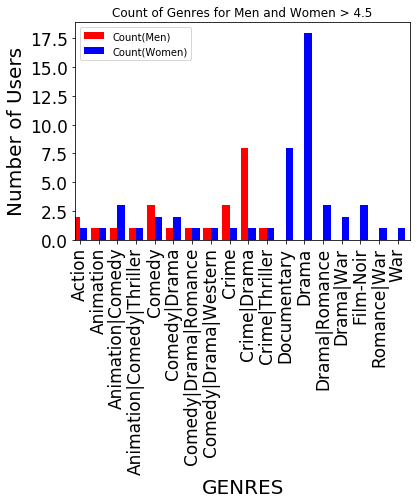

In [50]:
#Make some conjectures about how easy various groups are to please? Support your answers with data!

#1- For which Genre does men and women tend to give high ratings(finding out Based on count of such high ratings)

#Extract data from merged file
Wholedata = pd.read_csv('/Users/apple/Desktop/ml-1m/MovieData1.csv', header=0)
Wholedata.head()

#Group by Movie ID, Title, Genre, Gender and get the mean
Groupmidgender=Wholedata.groupby(["Movie_id","Title","Genre","Gender"]).mean()
Groupmidgender.head()

#Ratings above 4.5 
df=pd.DataFrame(Groupmidgender)
df.reset_index(level=["Title","Genre","Gender"], inplace=True)
Rating=df[df["Rating"]>4.5]
Rating45=Rating[["Title","Genre","Gender","Rating"]]#female who rated >= 4.5

#movies rated by Male > 4.5
Ratingmen45=Rating45[Rating45["Gender"]=='M']
Ratingmen45

#movies rated by Female > 4.5
Ratingwomen45=Rating45[Rating45["Gender"]=='F']
len(Ratingwomen45)

#Count of genres with rating 4.5 and above (men)
df=pd.DataFrame(Ratingmen45.groupby("Genre").size())
df["Count(Men)"]=df
del df[0]
men45genre=df
men45genre

#Count of genres with rating 4.5 above (women)
df1=pd.DataFrame(Ratingwomen45.groupby("Genre").size())
df1["Count(Women)"]=df1
del df1[0]
women45genre=df1

#plot men vs women count for movies rating>4.5
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
men45genre.plot(kind='bar', color='red', ax=ax,width=0.4, position=1,fontsize=fontsize+2,title="Count of Genres for Men and Women > 4.5")
women45genre.plot(kind='bar', color='blue', ax=ax,width=0.4, position=0,fontsize=fontsize+2,title="Count of Genres for Men and Women > 4.5")
ax.set_ylabel("Number of Users",fontsize=fontsize+5)
ax.set_xlabel("GENRES",fontsize=fontsize+5)

plt.tight_layout()
plt.show()

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text yticklabel objects>)

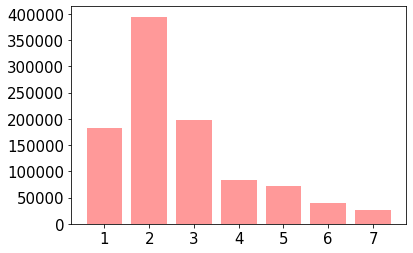

In [63]:
##Age wise number of movies watched
Wholedata = pd.read_csv('/Users/apple/Desktop/ml-1m/MovieData1.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Genre","Title","Age"]).size())
df2["Count"]=df2
del df2[0]
agegenre=df2
agegenre.reset_index(level=["Title","Genre","Age"], inplace=True)
agegenre1=agegenre[(agegenre["Age"]>=18) & (agegenre["Age"]<=24)]
agegenre2=agegenre[(agegenre["Age"]>=25) & (agegenre["Age"]<=34)]
agegenre3=agegenre[(agegenre["Age"]>=35) & (agegenre["Age"]<=44)]
agegenre4=agegenre[(agegenre["Age"]>=45) & (agegenre["Age"]<=49)]
agegenre5=agegenre[(agegenre["Age"]>=50) & (agegenre["Age"]<=55)]
agegenre6=agegenre[(agegenre["Age"]>=56)]
agegenre7=agegenre[(agegenre["Age"]<18)]
agegenre1=agegenre1.sort_values(by=["Count"],ascending=False)
agegenre2=agegenre2.sort_values(by=["Count"],ascending=False)
agegenre3=agegenre3.sort_values(by=["Count"],ascending=False)
agegenre4=agegenre4.sort_values(by=["Count"],ascending=False)
agegenre5=agegenre5.sort_values(by=["Count"],ascending=False)
agegenre6=agegenre6.sort_values(by=["Count"],ascending=False)
agegenre7=agegenre7.sort_values(by=["Count"],ascending=False)

#plot age wise number of movies watched
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
fontsize=15
plt.bar((1,2,3,4,5,6,7),(sum(agegenre1["Count"]),sum(agegenre2["Count"]),sum(agegenre3["Count"]),sum(agegenre4["Count"]),sum(agegenre5["Count"]),sum(agegenre6["Count"]),sum(agegenre7["Count"])), alpha=0.4,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

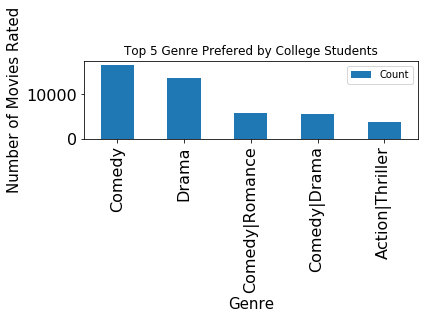

In [62]:
#Student Genre Wise

##Student
Wholedata = pd.read_csv('/Users/apple/Desktop/ml-1m/MovieData1.csv', header=0)
Wholedata.head()
df2=pd.DataFrame(Wholedata.groupby(["Occupation","Genre"]).size())
df2["Count"]=df2
del df2[0]
df2=df2.sort_values(by=["Count"],ascending=False)
df2
df2.reset_index(level=["Occupation","Genre"],inplace=True)
College=df2[df2["Occupation"]==4]
College=College.head(5)
College

#plot College genre
import matplotlib.pyplot as plt
fontsize=10
ax=College.plot(kind='bar',x='Genre',y='Count',fontsize=fontsize+6,title="Top 5 Genre Prefered by College Students")
ax.set_ylabel("Number of Movies Rated",fontsize=fontsize+5)
ax.set_xlabel("Genre",fontsize=fontsize+5)
plt.tight_layout()
plt.show()